In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 학습용 데이터의 개수
print(X_train.shape[0])

60000


In [4]:
# 테스트용 데이터의 개수
print(X_test.shape[0])

10000


In [5]:
# 28*28 ??
print(X_train.shape)

(60000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

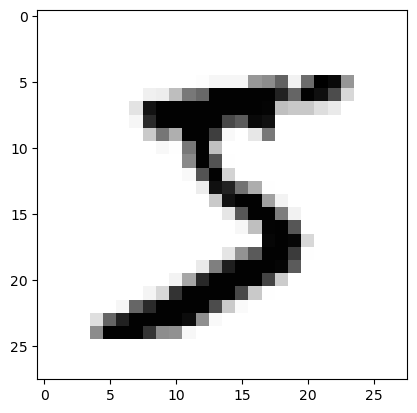

In [6]:
plt.imshow(X_train[0], cmap='Greys')
plt.show

In [7]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i) # %-3s 오른쪽 정렬
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [9]:
# 데이터 변형이 필요함..
# 3차원 데이터 -> 2차원 변형
X_train = X_train.reshape(X_train.shape[0], 28*28).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train[0])

5


In [12]:
y_train = to_categorical(y_train)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
y_test = to_categorical(y_test)

In [15]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])




In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                   batch_size=200, callbacks=[early_stop])

Epoch 1/30
225/225 [==============================] - 2s 6ms/step - loss: 0.3476 - accuracy: 0.9024 - val_loss: 0.1907 - val_accuracy: 0.9441
Epoch 2/30
225/225 [==============================] - 1s 4ms/step - loss: 0.1444 - accuracy: 0.9588 - val_loss: 0.1389 - val_accuracy: 0.9609
Epoch 3/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0954 - accuracy: 0.9726 - val_loss: 0.1099 - val_accuracy: 0.9680
Epoch 4/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0704 - accuracy: 0.9803 - val_loss: 0.0988 - val_accuracy: 0.9710
Epoch 5/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9853 - val_loss: 0.0912 - val_accuracy: 0.9736
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0400 - accuracy: 0.9892 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 7/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9920 - val_loss: 0.0864 - val_accuracy: 0.9743
Epoch 

In [22]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1])) 

313/313 [==============================] - 1s 1ms/step - loss: 0.0670 - accuracy: 0.9809
Test Accuracy: 0.9809


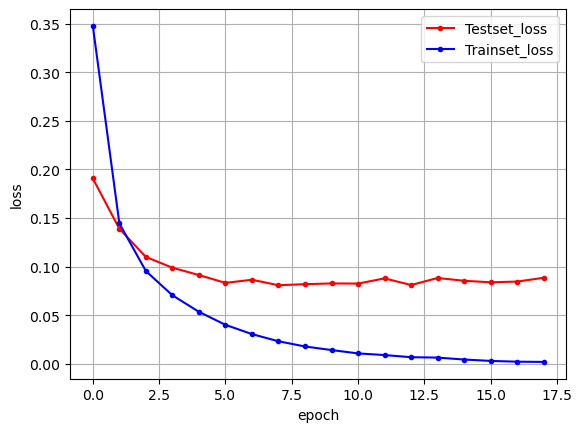

In [23]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()